In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
irisFile = open("Iris.csv","r")
df = pd.read_csv(irisFile)
species = sorted(list(set(df["Species"])))
print(species)


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [3]:
df["Species"] = df["Species"].apply(lambda s : species.index(s))

In [4]:
x, y = df.iloc[:,1:-1], df.iloc[:,-1]

In [5]:
baseDf = df[df["Species"] != 2]
extraDf = df[df["Species"] == 2]

baseX, baseY = baseDf.iloc[:,1:-1], baseDf.iloc[:,-1]
extraX, extraY = extraDf.iloc[:,1:-1], extraDf.iloc[:,-1]

In [6]:
baseDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [7]:
extraDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,2
101,102,5.8,2.7,5.1,1.9,2
102,103,7.1,3.0,5.9,2.1,2
103,104,6.3,2.9,5.6,1.8,2
104,105,6.5,3.0,5.8,2.2,2
105,106,7.6,3.0,6.6,2.1,2
106,107,4.9,2.5,4.5,1.7,2
107,108,7.3,2.9,6.3,1.8,2
108,109,6.7,2.5,5.8,1.8,2
109,110,7.2,3.6,6.1,2.5,2


In [8]:
baseXTrain, baseXTest, baseYTrain, baseYTest = train_test_split(baseX, baseY, train_size=0.8)
extraXTrain, extraXTest, extraYTrain, extraYTest = train_test_split(extraX, extraY, train_size=0.8)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8)


In [9]:
baseXTensorTrain = torch.tensor(np.array(baseXTrain.values), dtype=torch.float32)
baseYTensorTrain = torch.tensor(np.array(baseYTrain.values), dtype=torch.long)

baseXTensorTest = torch.tensor(np.array(baseXTest.values), dtype=torch.float32)
baseYTensorTest = torch.tensor(np.array(baseYTest.values), dtype=torch.long)

extraXTensorTrain = torch.tensor(np.array(extraXTrain.values), dtype=torch.float32)
extraYTensorTrain = torch.tensor(np.array(extraYTrain.values), dtype=torch.long)

extraXTensorTest = torch.tensor(np.array(extraXTest.values), dtype=torch.float32)
extraYTensorTest = torch.tensor(np.array(extraYTest.values), dtype=torch.long)

xTensorTrain = torch.tensor(np.array(xTrain.values), dtype=torch.float32)
yTensorTrain = torch.tensor(np.array(yTrain.values), dtype=torch.long)

xTensorTest = torch.tensor(np.array(xTest.values), dtype=torch.float32)
yTensorTest = torch.tensor(np.array(yTest.values), dtype=torch.long)


In [144]:
def inference(model, xTensor, yTensor):
  yPred = model(xTensor)
  yPred = torch.argmax(yPred,dim = 1)
  for x,y in zip(yPred,yTensor):
    print(int(x),int(y),sep="|")
  print("Accuracy:", accuracy_score(yPred.cpu(), yTensor))
  print("Confusion Matrix:\n", confusion_matrix(yTensor,yPred.cpu()))

In [145]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 64)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(64, 16) # 64 neurons to 16 neurons
        self.drop = nn.Dropout(0.2) # Dropout for regularization
        self.act2 = nn.ReLU()       # Another ReLU
        self.l3 = nn.Linear(16, 3)  # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

In [146]:
def fit(model,xTensor,yTensor):
    epochs = 400
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        ypred = model(xTensor)
        loss = loss_fn(ypred, yTensor)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

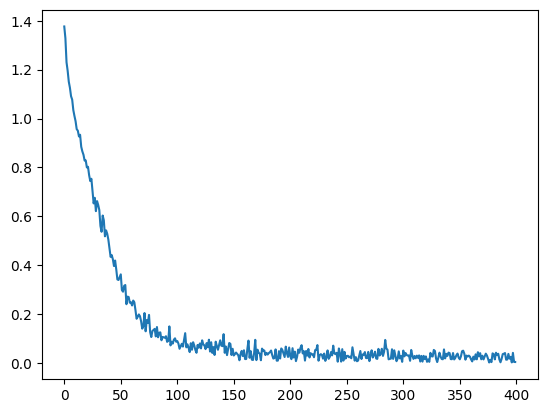

In [147]:
model = FullyConnected()
fit(model,baseXTensorTrain,baseYTensorTrain)

In [148]:
inference(model,baseXTensorTest,baseYTensorTest)

1|1
1|1
1|1
0|0
0|0
1|1
0|0
0|0
0|0
0|0
1|1
1|1
0|0
1|1
0|0
1|1
0|0
0|0
1|1
1|1
Accuracy: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 10]]


In [17]:
torch.save(model,"model")

# Naive approach

In [18]:
newModel = FullyConnected()
newModel = torch.load("model",weights_only=False)

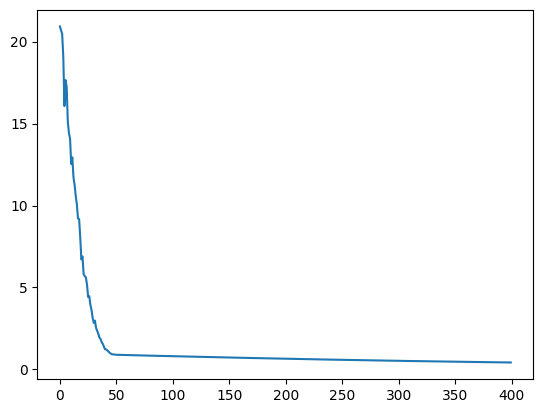

In [19]:
fit(newModel,extraXTensorTrain, extraYTensorTrain)

In [149]:
inference(newModel,xTensorTest,yTensorTest)

2|1
0|0
2|2
0|0
2|1
2|2
2|2
2|1
2|1
2|2
2|2
2|1
2|2
0|0
0|0
0|0
2|2
2|1
2|1
0|0
0|0
0|0
2|1
0|0
2|2
2|1
2|2
2|1
2|1
0|0
Accuracy: 0.6333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  0 11]
 [ 0  0  9]]


# Distillation loss

In [24]:
distillationModel = torch.load("model")
model.eval()

FullyConnected(
  (l1): Linear(in_features=4, out_features=64, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=64, out_features=16, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (act2): ReLU()
  (l3): Linear(in_features=16, out_features=3, bias=True)
)

In [25]:
def distillationFit(oldModel, newModel, xTensor, yTensor, lambdaValue):
  ceLoss = nn.CrossEntropyLoss()
  klLoss = nn.KLDivLoss(reduction="batchmean")
  optim = torch.optim.Adam(newModel.parameters(), lr=1e-4)
  epochs = 400
  for _ in range(epochs):
    newPred = newModel(xTensor)
    with torch.no_grad():
      oldPred = oldModel(xTensor)
      distillationLoss = klLoss(
        torch.log_softmax(newPred,dim=1),
        torch.softmax(oldPred,dim=1)
      )

    ceLossValue = ceLoss(newPred,yTensor)

    loss = distillationLoss * lambdaValue + ceLossValue * (1-lambdaValue)
      
    optim.zero_grad()
    loss.backward()
    optim.step()
        

In [26]:
distillationFit(model,distillationModel,extraXTensorTrain,extraYTensorTrain,10)

In [150]:
inference(distillationModel,xTensorTest,yTensorTest)

1|1
0|0
1|2
1|0
1|1
1|2
1|2
1|1
1|1
1|2
1|2
1|1
1|2
0|0
0|0
0|0
1|2
1|1
1|1
0|0
0|0
1|0
1|1
1|0
1|2
1|1
1|2
1|1
1|1
1|0
Accuracy: 0.5666666666666667
Confusion Matrix:
 [[ 6  4  0]
 [ 0 11  0]
 [ 0  9  0]]


# EWC

In [40]:
def computeFisherMatrix(model, xTensor, yTensor):
  fisherMatrix = {name:torch.zeros_like(param) for name, param, in model.named_parameters()}
  model.eval()

  model.zero_grad()
  preds = model(xTensor)
  loss = nn.CrossEntropyLoss()(preds, yTensor)
  loss.backward()

  for name, param in model.named_parameters():
    fisherMatrix[name] += param.grad ** 2

  for name in fisherMatrix:
    fisherMatrix[name] /= len(xTensor)
  
  return fisherMatrix

In [41]:
def ewcLoss(model, fisherMatrix, oldWeight, lambdaValue):
  ewcTerm = 0
  for name, param in model.named_parameters():
        ewcTerm += (fisherMatrix[name] * (param - oldWeight[name]) ** 2).sum()
  return ewcTerm * lambdaValue

In [42]:
def psuedoOldData(model, xTensor, numOfSample):
  pseudoXTensor = torch.randn(numOfSample, *xTensor.shape)
  pseudoYTensor = torch.argmax(model(pseudoXTensor), dim=1)
  return (pseudoXTensor, pseudoYTensor)

In [43]:
def ewcFit(oldModel, newModel, newXTensor, newYTensor, lambdaValue):
    optim = torch.optim.Adam(newModel.parameters(), lr=1e-4)
    oldWeight = {name: torch.zeros_like(param)
                 for name, param in oldModel.named_parameters()}
    pseudoXTensor, pseudoYTensor = psuedoOldData(oldModel,newXTensor,100)
    fisherMatrix = computeFisherMatrix(oldModel, pseudoXTensor, pseudoYTensor)
    epochs = 400

    for i in range(epochs):
        yPreds = newModel(newXTensor)
        ceLoss = nn.CrossEntropyLoss()(yPreds,newYTensor)
        loss = ceLoss + ewcLoss(newModel,fisherMatrix,oldWeight,lambdaValue)

        optim.zero_grad()
        loss.backward()
        optim.step()

In [136]:
model = torch.load("model")
ewcModel = torch.load("model")

In [137]:
ewcFit(model,ewcModel,extraXTensorTrain,extraYTensorTrain,10)

In [152]:
inference(ewcModel,extraXTensorTest,extraYTensorTest)

1|2
0|2
1|2
1|2
1|2
1|2
1|2
1|2
1|2
1|2
Accuracy: 0.0
Confusion Matrix:
 [[0 0 0]
 [0 0 0]
 [1 9 0]]


In [153]:
with torch.no_grad():
    outputs = ewcModel(extraXTensorTest)
    print(torch.softmax(outputs, dim=1))

tensor([[2.0272e-02, 9.7901e-01, 7.1366e-04],
        [2.5992e-02, 9.7249e-01, 1.5127e-03],
        [1.2236e-04, 9.9982e-01, 5.9403e-05],
        [4.1892e-03, 9.9552e-01, 2.8914e-04],
        [4.5943e-03, 9.9494e-01, 4.6537e-04],
        [4.7831e-04, 9.9926e-01, 2.6241e-04],
        [5.0737e-02, 9.4823e-01, 1.0347e-03],
        [8.5462e-01, 1.4077e-01, 4.6089e-03],
        [2.9510e-03, 9.9688e-01, 1.7131e-04],
        [6.6295e-01, 2.6424e-01, 7.2811e-02]])
